In [1]:
import pandas as pd

df=pd.read_csv('Loan_default.csv')

In [2]:
df=df.drop('LoanID',axis=1)

In [3]:
X=df.drop('Default',axis=1)
y=df['Default']



In [14]:
y.value_counts()

Default
0    225694
1     29653
Name: count, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
categorical_col=X_train.select_dtypes(include='object').columns
numeric_col=X_train.select_dtypes(include=['int64','float64']).columns

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
preprocessor=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),numeric_col),
        ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_col)

        
    ]
)


In [7]:
from xgboost import XGBClassifier
xgb = XGBClassifier(
    n_estimators=200,             
    learning_rate=0.1,           
    max_depth=3,                  
    subsample=0.9,
    colsample_bytree=0.8,
    scale_pos_weight=7.6,         
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1,
    verbosity=0
)

In [8]:
from sklearn.pipeline import Pipeline
pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',xgb)
])

In [9]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependen...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=-1,
                               num_parallel_tree=None, ...))])

In [10]:
y_pred=pipeline.predict(X_test)

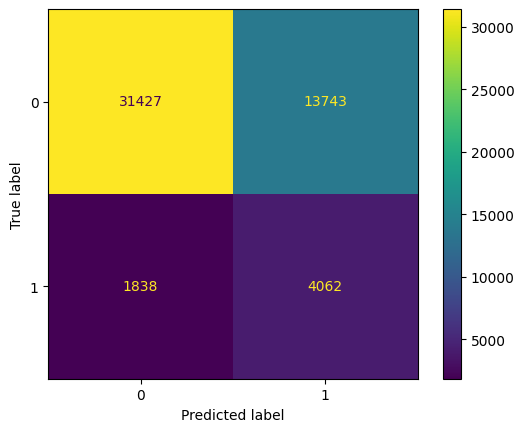

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [15]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
precision=precision_score(y_test,y_pred)
print("Precision:",precision)
recall=recall_score(y_test,y_pred)
print("Recall:",recall)
f1=f1_score(y_test,y_pred)
print("F1 Score:",f1)
roc_auc=roc_auc_score(y_test,y_pred)
print("ROC_AUC:",roc_auc)

Accuracy: 0.694908948502056
Precision: 0.22813816343723672
Recall: 0.6884745762711865
F1 Score: 0.3427125079097237
ROC_AUC: 0.6921119837300144


## Our Verdict

Our main focus is improving model's recall and Roc_Auc because False Negative(A defaulter is labeled as non-default) is more costly then a False Positive(A non-defaulter labeled as default) in real world financial related system and also the dataset is highly imbalanced so accuracy is not a good metric in this scenario

In [10]:
import joblib
joblib.dump(pipeline,'pipeline.pkl')

['pipeline.pkl']